In [1]:
import numpy
import itertools
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
from matplotlib import rc
import math
import copy
%matplotlib inline

In [2]:
rc('text', usetex=True)

In [3]:
def dist(i, j):
    return ((i - j) ** 2) + i

In [4]:
def calculate_dist(way):
    s = 0
    for index in range(1, len(way)):
        s += dist(way[index - 1], way[index])
    s += dist(way[len(way) - 1], way[0])
    return s

In [5]:
def generate_ways(N):
    cities = [i + 1 for i in range(N)]
    all_ways = itertools.permutations(cities)
    return all_ways

In [6]:
def find_min_way(all_ways):
    ways_dist = list(map(lambda way: calculate_dist(way), all_ways))
    return min(ways_dist)

In [7]:
time_list = []
min_ways = []
for i in tqdm(range(2, 11)):
    start_time = time.time()
    min_way = find_min_way(generate_ways(i))
    work_time = time.time() - start_time
    time_list.append(work_time)
    min_ways.append(min_way)

100%|██████████| 9/9 [00:26<00:00,  7.68s/it]


In [8]:
points = [math.factorial(i) for i in range(2, 11)]

In [9]:
log_points = list(map(lambda i: math.log(i), points))
log_time_list = list(map(lambda i: math.log(i), time_list))

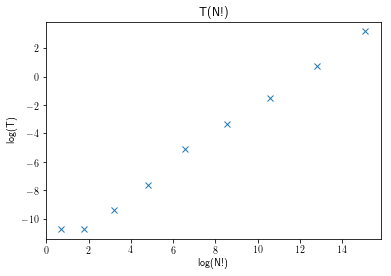

In [10]:
plt.title('T(N!)')
plt.xlabel('log(N!)')
plt.ylabel('log(T)')
plt.plot(log_points, log_time_list, 'x')

In [11]:
min_ways

[5, 12, 20, 29, 39, 50, 62, 75, 89]

In [12]:
time_list

[2.193450927734375e-05,
 2.2172927856445312e-05,
 8.368492126464844e-05,
 0.00048279762268066406,
 0.00594019889831543,
 0.034560203552246094,
 0.22849822044372559,
 2.1689321994781494,
 24.02472472190857]

In [13]:
epsilon = 0.3
delta = 1 + epsilon

In [14]:
def average(data):
    return sum(data) / len(data)

In [15]:
def find_way(cities, index):
    min_way = min_ways[index - 2]
    total_ways = math.factorial(index)
    alpha_list = []
    total_iters = []
    for j in range(2000):
        way = copy.deepcopy(cities)
        numpy.random.shuffle(way)
        i = 1
        cur_way = calculate_dist(way)
        while cur_way > (delta * min_way):
            numpy.random.shuffle(way)
            cur_way = calculate_dist(way)
            i += 1
        total_iters.append(i)
        alpha = i / total_ways
        alpha_list.append(alpha)
    return average(alpha_list), average(total_iters)

In [16]:
alpha_list = []
total_iters = []
for i in range(2, 11):
    cities = numpy.array([j + 1 for j in range(i)])
    alpha, iters = find_way(cities, i)
    alpha_list.append(alpha)
    total_iters.append(iters)

In [17]:
log_alpha_list = list(map(lambda i: math.log(i), alpha_list))

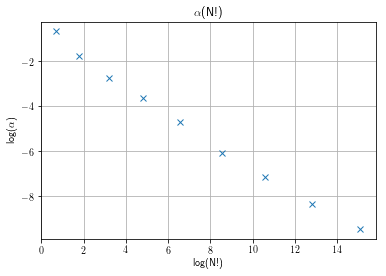

In [18]:
plt.title(r'$\alpha$(N!)')
plt.xlabel('log(N!)')
plt.ylabel(r'log($\alpha$)')
plt.grid(True)
plt.plot(log_points, log_alpha_list, 'x')

In [19]:
total_iters

[1.0, 1.0, 1.4945, 3.128, 6.5885, 11.282, 31.3995, 87.2695, 284.715]